<a href="https://colab.research.google.com/github/AdamaTG/Atelier-Regression-Lineaire/blob/main/INF6243_TP2_RegressionLineaire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TP : Modele lineaire pour la régression sur les données**

La [Régression linéaire](https://fr.wikipedia.org/wiki/R%C3%A9gression_lin%C3%A9aire) est une méthode permettant de modéliser la relation entre un ensemble de variables indépendantes $X$ (également appelées variables explicatives, caractéristiques, prédicteurs) et une variable dépendante $Y$. Cette méthode suppose que la relation entre chaque variable explicative $X$ est linéairement liée à la variable dépendante $Y$.

***
## **Formulation mathématique**
Le modèle prend la forme: $$ Y = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + ... + \beta_{k}X_{k} $$ 

Où:

$X_k$: variables prédictives

$Y$: variable dépendante

$\beta_0$: l'ordonnée à l'origine 

$\beta_k$: les coefficients de pente

***
## **But de la régression linéaire**

<div class="span5 alert alert-info">
</p>
<ul>
  <li> Créez un <b>modèle prédictif</b> pour prédire les valeurs futures de $X_k$ sans valeur $Y$. </li>
  <li> Modélisez la <b>force de la relation</b> entre chaque variable dépendante $X_k$ et $Y$</li>
    <ul>
      <li> Parfois, tous les $X_k$ n'auront pas de relation avec $Y$</li>
      <li> Besoin de déterminer quel $X_k$ fournit le plus d'informations pour déterminer $Y$ </li>
    </ul>
 </li>
</ul>
</div>







## **Cas pratique: Prédiction de la résistance du béton**

### **Introduction**

* La résistance à la compression détermine la qualité du béton 
* La résistance du béton est également considérée comme un facteur clé pour obtenir la durabilité souhaitée.

* En général, il faut Pour tester la force, il faudra 28 jours pour tester la résistance d'un béton

###  **Traval à faire** 
* Réduire ce lots de temps pour pour tester la résistance d'un béton en utilisant l'apprentissage machine

* Analyser un dataset de résistance à la compression du béton et créer un modèle de régression pour prédire la qualité du béton :

###  **Information sur le Dataset**: 

**Dataset**: 
[Concrete Compressive Strength](https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength) (Résistance à la compression du béton)

**Description**: 
Les  caractéristiques qui affectent la qualité du béton sont cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.





## **Découverte du jeu de donnée**

## **Import libraries**

In [ ]:
## Basic libs
import pandas as pd
import numpy as np
import seaborn as sns
import itertools

## Building Model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the dataset**

In [ ]:
datafiledir = "/content/drive/MyDrive/TP-INF6243/concrete_data.csv"

dataset = pd.read_csv(datafiledir) # xlsx



Analyse des données

In [ ]:
dataset.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
dataset.tail(15)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
1015,322.5,148.6,0.0,185.8,8.5,951.0,709.5,28,52.43
1016,164.2,0.0,200.1,181.2,12.6,849.3,846.0,28,15.09
1017,313.8,0.0,112.6,169.9,10.1,925.3,782.9,28,38.46
1018,321.4,0.0,127.9,182.5,11.5,870.1,779.7,28,37.27
1019,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23
1020,288.4,121.0,0.0,177.4,7.0,907.9,829.5,28,42.14
1021,298.2,0.0,107.0,209.7,11.1,879.6,744.2,28,31.88
1022,264.5,111.0,86.5,195.5,5.9,832.6,790.4,28,41.54
1023,159.8,250.0,0.0,168.4,12.2,1049.3,688.2,28,39.46
1024,166.0,259.7,0.0,183.2,12.7,858.8,826.8,28,37.92


Analyse numérique/statistique de l'ensemble de données


In [ ]:
dataset.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Dimensions of dataset

In [ ]:
print('There are ',dataset.shape[0],'rows and ',dataset.shape[1],'columns in the dataset.')

There are  1030 rows and  9 columns in the dataset.


Here we are trying to check if there are repeated values in the dataset or not.

In [ ]:
print('There are',dataset.duplicated().sum(),'duplicate values in the dateset.') #using duplicated() pre-defined function

There are 25 duplicate values in the dateset.


Check for NULL values

In [ ]:
dataset.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

Schema of dataset


In [ ]:
dataset.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


EDA on dataset

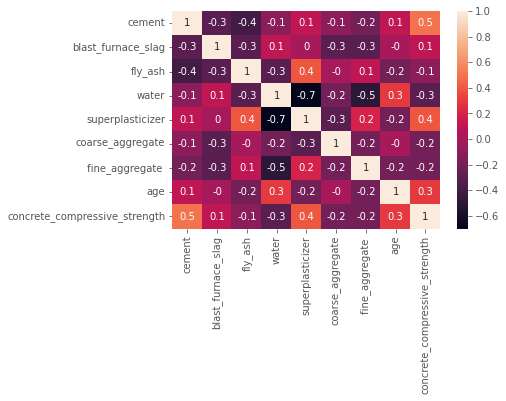

In [ ]:
# Etude de la correlation
matrice_corr = dataset.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True);
